In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv(r'C:\Users\BHAVANA\Downloads\Train.csv')
test_df = pd.read_csv(r'C:\Users\BHAVANA\Downloads\test.csv')

In [3]:
train_df.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051


In [4]:
test_df.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
data1     10000 non-null int64
data2     10000 non-null int64
data3     10000 non-null object
data4     10000 non-null float64
data5     9999 non-null float64
data6     9997 non-null float64
data7     9998 non-null float64
data8     9999 non-null float64
data9     9999 non-null object
data10    9999 non-null object
output    9999 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [9]:
train_df.dropna(axis=0, inplace=True)

In [10]:
# conversion of non numeric features into numeric

# creating label encoder object
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
#For Training
train_df['data3']= label_encoder.fit_transform(train_df['data3']) 
train_df['data9']= label_encoder.fit_transform(train_df['data9'])
train_df['data10']= label_encoder.fit_transform(train_df['data10']) 
   
   #For Testing
train_df['data3']= label_encoder.fit_transform(train_df['data3']) 
train_df['data9']= label_encoder.fit_transform(train_df['data9'])
train_df['data10']= label_encoder.fit_transform(train_df['data10']) 

In [11]:
train_df.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,0,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,0,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,0,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,0,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,0,64.925051


In [12]:
train_df.isnull().sum() #Checking for total null values

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
output    0
dtype: int64

In [14]:
np.any(np.isnan(train_df)) #Checking for null values

False

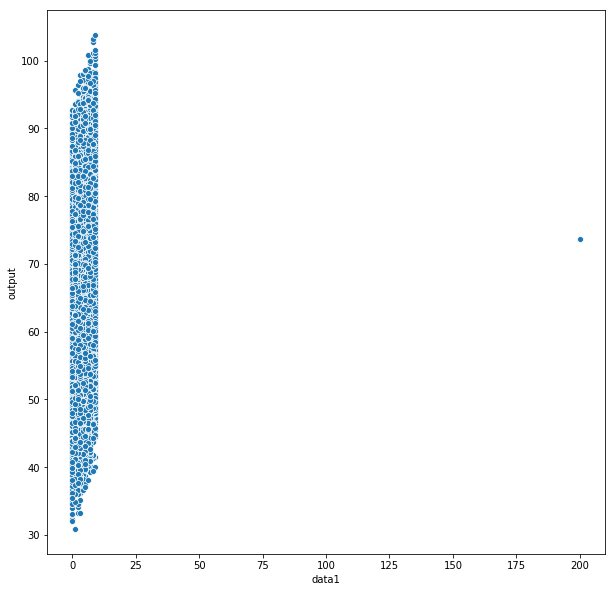

In [15]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_df['data1'], y = train_df['output'])

In [17]:
#1 Outlier FOUND, removing it using For loop.
i = train_df.loc[train_df['data1'] > 75].index
print(i)
train_df.drop(i, inplace = True)

Int64Index([18], dtype='int64')


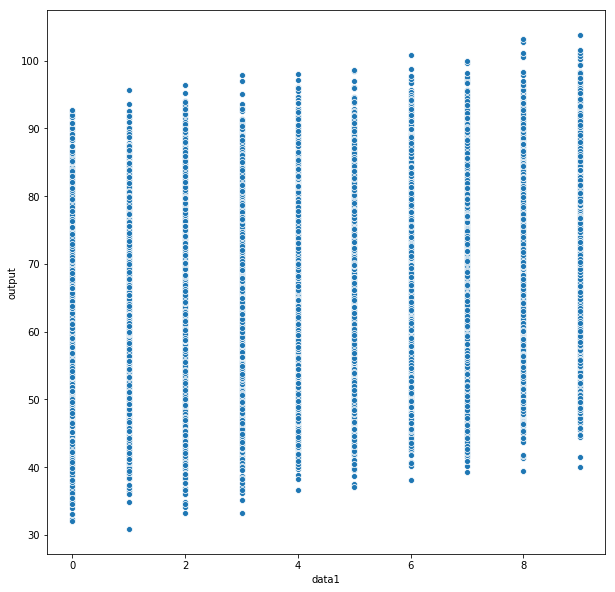

In [18]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_df['data1'], y = train_df['output'])

In [19]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

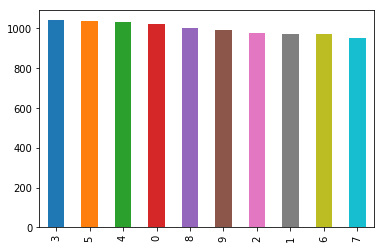

In [20]:
_ = train_df['data1'].value_counts().plot(kind='bar')
plt.show()

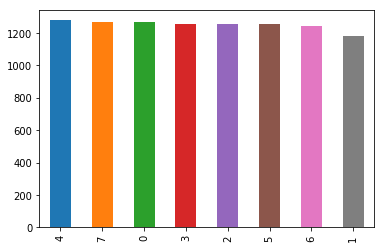

In [21]:
_ = train_df['data3'].value_counts().plot(kind='bar')
plt.show()

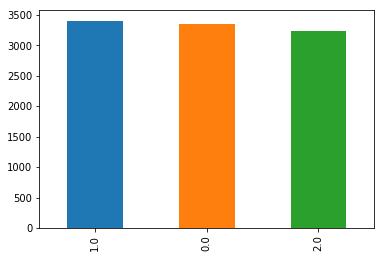

In [22]:
_ = train_df['data8'].value_counts().plot(kind='bar')
plt.show()

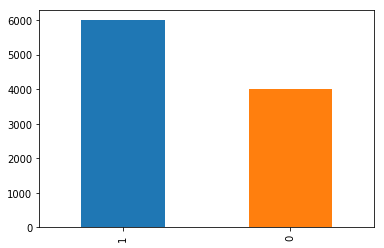

In [23]:
_ = train_df['data9'].value_counts().plot(kind='bar')
plt.show()

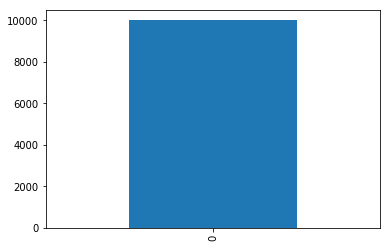

In [25]:
_ = train_df['data10'].value_counts().plot(kind='bar')
plt.show()

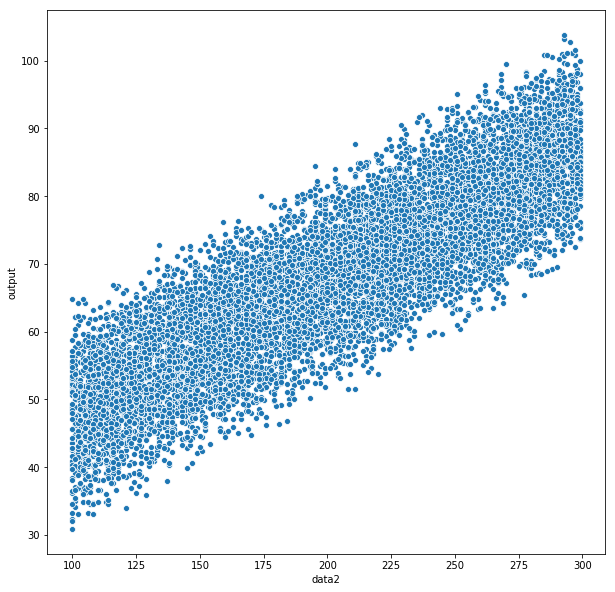

In [26]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_df['data2'], y = train_df['output'])

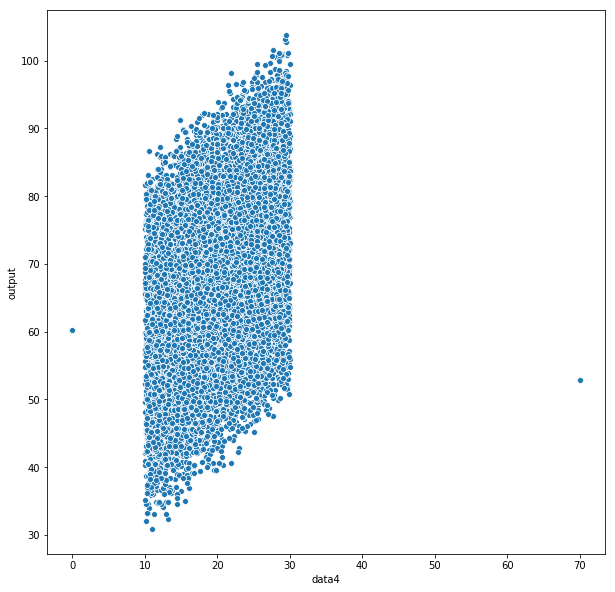

In [27]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_df['data4'], y = train_df['output'])

In [28]:
i = train_df.loc[train_df['data4'] > 50].index
print(i)
train_df.drop(i, inplace = True)

i = train_df.loc[train_df['data4'] < 10].index
print(i)
train_df.drop(i, inplace = True)

Int64Index([33], dtype='int64')
Int64Index([81], dtype='int64')


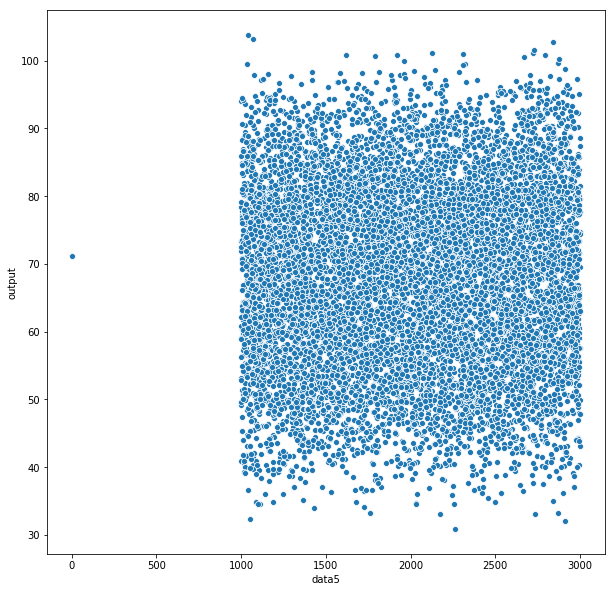

In [30]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_df['data5'], y = train_df['output'])

In [31]:
i = train_df.loc[train_df['data5'] < 500].index
print(i)
train_df.drop(i, inplace = True)

Int64Index([46], dtype='int64')


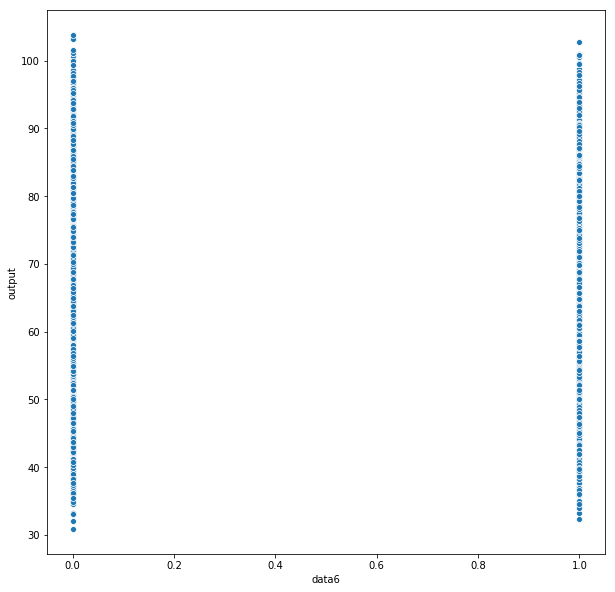

In [32]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_df['data6'], y = train_df['output'])

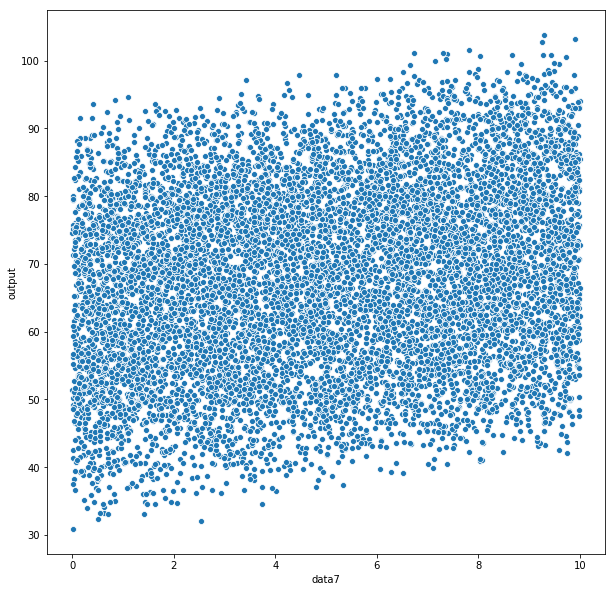

In [33]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_df['data7'], y = train_df['output'])

In [34]:
del train_df["data10"]
del test_df["data10"]

In [35]:
train_df

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,64.925051
5,3,233,5,21.052830,2571.0,1.0,9.603920,2.0,1,78.151467
6,2,225,1,27.926836,2630.0,1.0,6.173447,2.0,1,78.307600
7,4,225,5,11.263795,1643.0,1.0,2.537428,1.0,1,61.674843
8,0,240,0,10.621867,2945.0,1.0,2.015180,1.0,1,59.574860
9,8,208,6,17.706433,1804.0,1.0,9.252709,1.0,1,74.788498


In [36]:
X = train_df.drop(['output'], axis = 1, inplace = False)
y = train_df['output']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7494, 9) (2499, 9) (7494,) (2499,)


In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
y_pred = regressor.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
1643,78.109018,78.109018
1348,47.901732,47.901732
3425,76.584313,76.584313
1352,70.346561,70.346561
8078,81.167425,81.167425
944,51.938924,51.938924
1379,64.001484,64.001484
4521,85.423094,85.423094
6090,70.311899,70.311899
7042,55.941119,55.941119


In [40]:
r2_score(y_test, y_pred)

1.0

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform')

In [45]:
y_pred = knn.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
1643,78.109018,76.264837
1348,47.901732,45.902519
3425,76.584313,79.293530
1352,70.346561,68.610158
8078,81.167425,81.364960
944,51.938924,56.291078
1379,64.001484,61.512806
4521,85.423094,79.283747
6090,70.311899,73.388983
7042,55.941119,60.704907


In [46]:
r2_score(y_test, y_pred)

0.8424354504022746